In [113]:
import geopandas as gpd
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import shapely.speedups
import sqlite3
import folium
%config Completer.use_jedi = False #for auto complete code
#https://www.educative.io/answers/how-to-create-a-datetime-column-in-pandas

In [114]:
file ='../data/Automaticas/Para el Consultor Niveles Horarios.xlsx'

In [115]:
xls=pd.ExcelFile(file)

In [116]:
conn = sqlite3.connect('../data/DZ/niveles_automaticos.db')
for hoja in xls.sheet_names:
    df=pd.read_excel(file,sheet_name=hoja)
    table_name='T'+str(np.unique(df.COD).tolist()[0])
    
    cols=['Codigo','Estacion','ano','mes','dia','hora','Nivel']
    df.columns=cols

    cols=['mes','dia','ano','hora']
    dateDF=df[cols]
    dateDF.columns=['month', 'day', 'year','hour']
    df['Fecha Reg']=pd.to_datetime(dateDF)
    cols=['Codigo','Estacion','Fecha Reg','ano','mes','dia','hora','Nivel']
    df = df[cols]
    
    df.to_sql(name = table_name,con=conn, if_exists='replace',index=False)
    conn.commit()
conn.close()

C:\Users\jose\anaconda3\envs\work_env\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


<AxesSubplot:xlabel='Fecha Reg'>

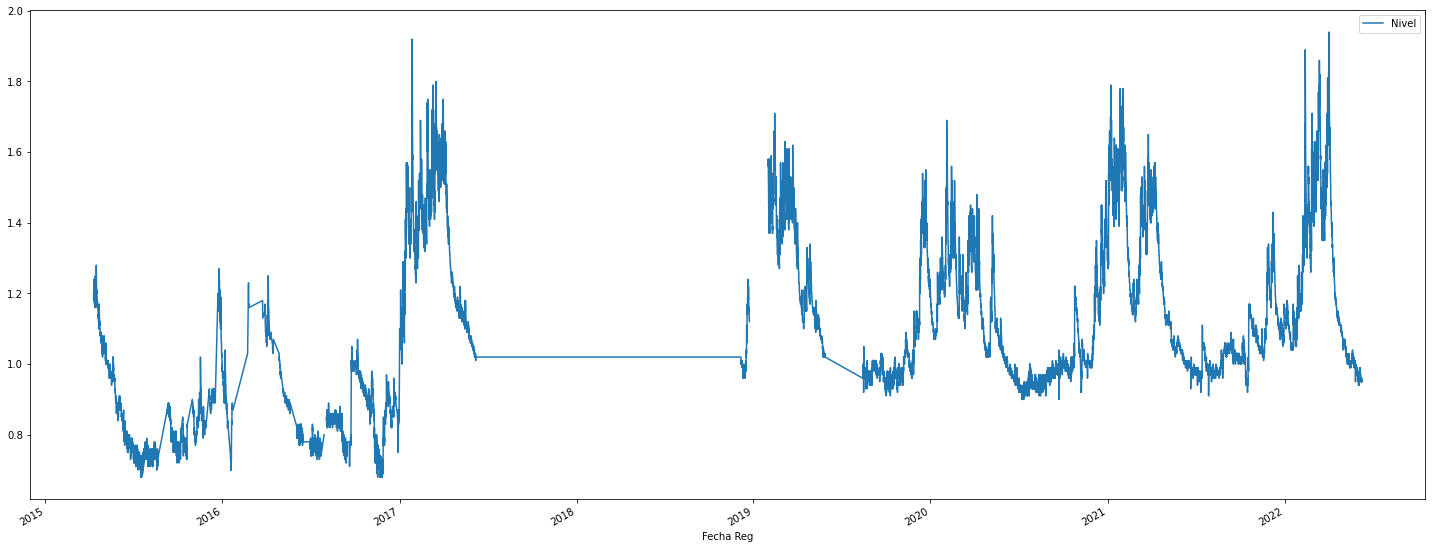

In [117]:
df.plot(x='Fecha Reg',y=['Nivel'],figsize = (25,10))

In [67]:
columns={}
for col in [f'Nivel {i:02}h' for i in range(24)]:
    columns[col]=[]

In [54]:
for i in range(df.shape[0]):
    col_idx=df.hora[i]
    nivel=f'Nivel {col_idx}h'
    columns[nivel].append(df.nivel[i])

In [66]:
columns

{'Nivel 00h': [],
 'Nivel 01h': [],
 'Nivel 02h': [],
 'Nivel 03h': [],
 'Nivel 04h': [],
 'Nivel 05h': [],
 'Nivel 06h': [],
 'Nivel 07h': [],
 'Nivel 08h': [],
 'Nivel 09h': [],
 'Nivel 10h': [],
 'Nivel 11h': [],
 'Nivel 12h': [],
 'Nivel 13h': [],
 'Nivel 14h': [],
 'Nivel 15h': [],
 'Nivel 16h': [],
 'Nivel 17h': [],
 'Nivel 18h': [],
 'Nivel 19h': [],
 'Nivel 20h': [],
 'Nivel 21h': [],
 'Nivel 22h': [],
 'Nivel 23h': []}